DESKRIPSI PROYEK

    Data diindeks sesuai dengan tanggal dan waktu perolehannya (fitur date). Terkait waktu, parameter yang berdekatan sering kali serupa.
    Sebagian parameter tidak tersedia karena pengukuran dan/atau penghitungannya dilakukan jauh setelahnya. Itulah sebabnya, beberapa fitur yang ada di training set mungkin tidak ada di test set. Test set-nya pun juga tidak memuat target.
    Dataset sumber memuat training dan test set dengan semua fitur-fiturnya.
    Kita perlu memprediksi dua nilai:
1. Perolehan konsentrat yang lebih kasar rougher.output.recovery
2. Perolehan konsentrat akhir final.output.recovery

## PRA PEM-PROSESAN DATA

### Library dan Informasi Umum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
path = '/datasets/gold_recovery_train.csv'
path_1 = '/datasets/gold_recovery_test.csv'
path_2 = '/datasets/gold_recovery_full.csv'

In [ ]:
df_train = pd.read_csv(path)
df_test = pd.read_csv(path_1)
df_full = pd.read_csv(path_2)

In [ ]:
df_train.sample()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
576,2016-02-08 00:00:00,4.997195,9.844883,NaN,45.995388,55.088921,10.490499,1.041974,16.135328,2.101326,...,16.998771,-501.088883,16.034427,-501.748615,18.041118,-499.095369,15.977548,-499.55744,18.025695,-500.672919


In [ ]:
df_test.sample()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
225,2016-09-10 09:59:59,104.137129,6.002255,7.76,0.789602,1299.387035,-498.600133,1300.422722,-500.519462,1297.617828,...,7.934328,-499.709053,5.00391,-499.781391,8.041132,-501.034032,3.083167,-500.23116,19.990129,-599.879735


In [ ]:
df_full.sample()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12284,2017-06-09 19:59:59,4.258554,10.561558,7.770812,45.949193,50.343771,8.612142,3.241787,9.270741,3.276095,...,14.981538,-500.863224,10.048225,-380.45132,15.020185,-501.285747,10.011949,-500.309102,14.988486,-501.508177


In [ ]:
df_train.shape , df_test.shape , df_full.shape

((16860, 87), (5856, 53), (22716, 87))

In [ ]:
df_full.duplicated().sum()

0

In [ ]:
df_test_full = df_full[df_full['date'].isin(df_test['date'])]

In [ ]:
df_test_full.shape

(5856, 87)

KESIMPULAN

kolom pada dataframe test lebih sedikit dari kolom dataframe full, berarti ada beberapa kolom yang hilang

### Periksa apakah perolehan emas telah dihitung dengan benar. Menggunakan training set, hitung perolehan untuk fitur rougher.output.recovery. Temukan MAE antara perhitungan Anda dan nilai fitur. Tunjukkan apa yang Anda temukan.

In [ ]:
c= 'rougher.output.concentrate_au'
f= 'rougher.input.feed_au'
t= 'rougher.output.tail_au'

In [ ]:
perolehan_cft= df_train[c] * (df_train[f] - df_train[t])
perolehan_fct= df_train[f] * (df_train[c] - df_train[t])

In [ ]:
perolehan_cft.isna().sum()

2250

In [ ]:
perolehan_fct.isna().sum()

2250

In [ ]:
perolehan_cft= perolehan_cft.fillna(0)

In [ ]:
perolehan_fct= perolehan_fct.fillna(1)

In [ ]:
perolehan = perolehan_cft /perolehan_fct * 100

In [ ]:
selisih = (perolehan - df_train['rougher.output.recovery']).abs().mean()

In [ ]:
print(f'selisih hasil antara perhitungan manual dengan data adalah {selisih}')

selisih hasil antara perhitungan manual dengan data adalah 9.303415616264301e-15


KESIMPULAN

dari hasil yang di dapat 9....-15, menandakan bahwa hasil perhitungan manual dengan kolom **rougher.output.recovery** adalah sama

### Analisis fitur-fitur yang tidak tersedia pada test set.Apa saja parameter-parameter ini? Tipe apakah parameter-parameter tersebut?

In [ ]:
miss_columns = set(list(df_train.columns.values)) - set(list(df_test.columns.values))

In [ ]:
df_full[miss_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.concentrate_ag               22618 non-null  float64
 1   rougher.output.concentrate_pb                       22618 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   rougher.output.tail_ag                              19979 non-null  float64
 4   rougher.output.tail_sol                             19980 non-null  float64
 5   primary_cleaner.output.tail_sol                     22365 non-null  float64
 6   rougher.calculation.sulfate_to_au_concentrate       22672 non-null  float64
 7   primary_cleaner.output.concentrate_pb               22268 non-null  float64
 8   rougher.calculation.floatbank11_sulfate_to_au_feed  22672 non-null  float64


### ambil fitur yang dibutuhkan untuk analisa emas

In [ ]:
col_au = pd.DataFrame(df_full.columns,df_full.columns.str.contains('au')).reset_index()
col_au = col_au[col_au['index'] == True]
col_au = list(col_au[0])
col_au.append('rougher.output.recovery')
col_au.append('final.output.recovery')
col_au.append('rougher.input.feed_size')
col_au.append('rougher.input.feed_rate')
col_au

['final.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'rougher.output.recovery',
 'final.output.recovery',
 'rougher.input.feed_size',
 'rougher.input.feed_rate']

#### df_train

In [ ]:
df_train_au = df_train[col_au]

In [ ]:
df_train_au.shape

(16860, 16)

In [ ]:
df_train_au.isna().sum()

final.output.concentrate_au                             71
final.output.tail_au                                    66
primary_cleaner.output.concentrate_au                   82
primary_cleaner.output.tail_au                          83
rougher.calculation.sulfate_to_au_concentrate           27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
rougher.calculation.au_pb_ratio                       1242
rougher.input.feed_au                                   83
rougher.output.concentrate_au                           82
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_au                        82
rougher.output.recovery                               2573
final.output.recovery                                 1521
rougher.input.feed_size                                417
rougher.input.feed_rate                                513
dtype: int64

In [ ]:
df_train_au.dropna().shape

(13998, 16)

In [ ]:
print('Bobot nilai yang hilang terhadap data train au adalah',
     100 - (df_train_au.dropna().shape[0]/df_train_au.shape[0] *100), '%')

Bobot nilai yang hilang terhadap data train au adalah 16.97508896797153 %


In [ ]:
df_train_au= df_train_au.dropna()

#### df_test_full

In [ ]:
df_test_full_au = df_test_full[col_au]

In [ ]:
df_test_full_au.shape

(5856, 16)

In [ ]:
df_test_full_au.isna().sum()

final.output.concentrate_au                            15
final.output.tail_au                                   15
primary_cleaner.output.concentrate_au                  16
primary_cleaner.output.tail_au                         16
rougher.calculation.sulfate_to_au_concentrate          17
rougher.calculation.floatbank10_sulfate_to_au_feed     17
rougher.calculation.floatbank11_sulfate_to_au_feed     17
rougher.calculation.au_pb_ratio                       385
rougher.input.feed_au                                  16
rougher.output.concentrate_au                          16
rougher.output.tail_au                                487
secondary_cleaner.output.tail_au                       16
rougher.output.recovery                               546
final.output.recovery                                 442
rougher.input.feed_size                                22
rougher.input.feed_rate                                40
dtype: int64

In [ ]:
df_test_full_au.dropna().shape

(5287, 16)

In [ ]:
print('Bobot nilai yang hilang terhadap data train au adalah',
     100 - (df_test_full_au.dropna().shape[0]/df_test_full_au.shape[0] *100), '%')

Bobot nilai yang hilang terhadap data train au adalah 9.716530054644807 %


In [ ]:
df_test_full_au= df_test_full_au.dropna()

KESIMPULAN

dari 87 kolom kita melakukan elimminasi pada kolom menjadi 16 kolom yang berkaitan dengan Emas/au. dan juga kita melakukan drop kepada baris yang memiliki nilai hilang dikarenakan perbedaan antara data asli dan yang sudah di drop kurang dari 20%

### Buatlah catatan terkait bagaimana konsentrasi logam (Au, Ag, Pb) berubah, tergantung pada tahap pemurniannya.

In [ ]:
steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        df_full[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)

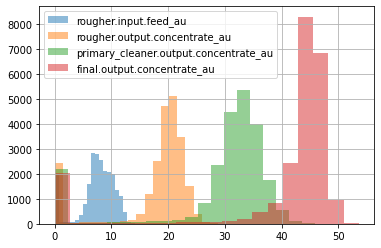

In [ ]:
plot_concentrate_progress('au')

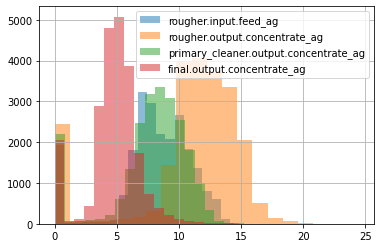

In [ ]:
plot_concentrate_progress('ag')

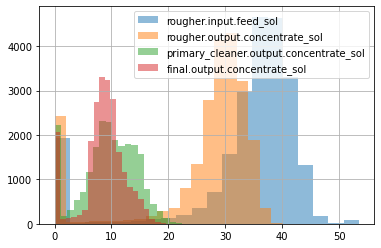

In [ ]:
plot_concentrate_progress('sol')

**KESIMPULAN**

sepertinya proses konsentrat au/emas lebih baik dibanding dengan ag dan sol yang proses nya masih berantakan

### Bandingkan distribusi ukuran partikel umpan dalam training set maupun dalam test set. Jika distribusinya bervariasi secara signifikan, evaluasi model akan salah.

In [ ]:
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_train_test_feature(feature,title):
    filter_outliers(df_train_au[feature]).plot.kde()
    filter_outliers(df_test_full_au[feature]).plot.kde()
    plt.legend(['train', 'test'])
    plt.title(title)

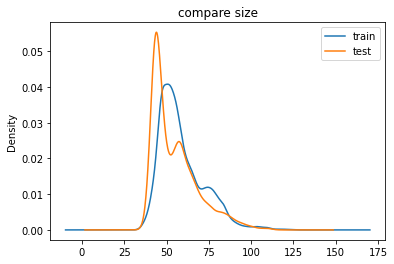

In [ ]:
compare_train_test_feature('rougher.input.feed_size','compare size')

### Pertimbangkan total konsentrasi semua substansi di tahap yang berbeda: umpan (feed) mentah, konsentrasi yang lebih kasar, dan konsentrasi akhir. Apakah Anda melihat adanya nilai abnormal dalam distribusi total? Jika ya, apakah perlu menghapus nilai-nilai tersebut dari kedua sampel? Jelaskan yang Anda temukan dan singkirkan anomalinya.

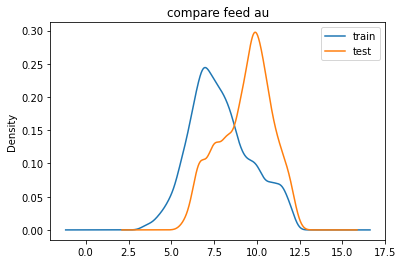

In [ ]:
compare_train_test_feature('rougher.input.feed_au','compare feed au')

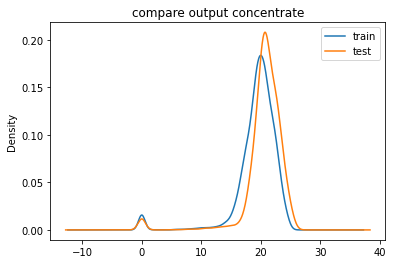

In [ ]:
compare_train_test_feature('rougher.output.concentrate_au','compare output concentrate')

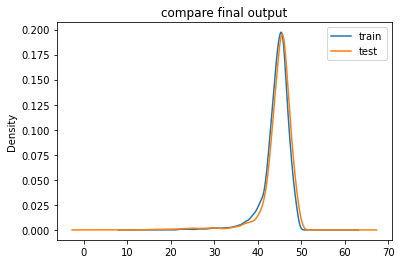

In [ ]:
compare_train_test_feature('final.output.concentrate_au','compare final output')

**Kesimpulan**

dari hasil grafik didaptkan Distribusi dataframe train dan test memiliki kemiripan distribusi


##

### Ketiklah sebuah fungsi untuk menghitung nilai sMAPE akhir.

In [ ]:
target = ['final.output.recovery','rougher.output.recovery']
features =  df_train_au.drop(columns=target).columns.values

In [ ]:
features_train = df_train_au[features].reset_index(drop=True)
target_train = df_train_au[target].reset_index(drop=True)
target_train.columns = [0,1]

In [ ]:
features_test = df_test_full_au[features].reset_index(drop=True)
target_test = df_test_full_au[target].reset_index(drop=True)
target_test.columns = [0,1]

In [ ]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2

    return (error / scale).mean() * 100


def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])

    return 0.25 * rougher + 0.75 * final


In [ ]:
pred_median =target_train.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_train, pred_median))

pred_median =target_test .copy()
pred_median[0] = target_test[0].median()
pred_median[1] = target_test[1].median()
print(smape_weighted(target_test, pred_median))

11.255772175698631
8.334716606429563


### Lakukan pelatihan pada model yang berbeda-beda. Evaluasi model-model tersebut menggunakan validasi silang. Pilihlah model terbaik dan uji model tersebut menggunakan sampel tes atau test sample. Tunjukkan apa yang Anda temukan.

In [ ]:
def score_model(model, cv=4):
    scores = []

    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):

        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)

        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)

        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))

        scores.append(smape_weighted(target_valid, pred_valid))

    return pd.Series(scores).mean()

In [ ]:
modelLR = LinearRegression()
lr_score = score_model(modelLR)
lr_score

9.050865408077176

In [ ]:
modelRF = RandomForestRegressor(random_state=12345,max_depth=5 ,n_estimators=50)
rf_score = score_model(modelRF)
rf_score

6.433320033075551

In [ ]:
modelDT = RandomForestRegressor(random_state=12345,max_depth=3)
dt_score = score_model(modelDT)
dt_score

8.838185062286751

### Final Test

In [ ]:
%%time
model_final = RandomForestRegressor(random_state=12345,max_depth=8 ,n_estimators=50)
model_final.fit(features_train,target_train)

pred = pd.DataFrame(model_final.predict(features_train))
print('sMAPE akhir data train adalah ', smape_weighted(target_train, pred) )

pred = pd.DataFrame(model_final.predict(features_test))
print('sMAPE akhir data test adalah ', smape_weighted(target_test, pred) )

sMAPE akhir data train adalah  2.781797688894442
sMAPE akhir data test adalah  2.662002747995065
CPU times: user 7 s, sys: 3.19 ms, total: 7.01 s
Wall time: 7.1 s


**Kesimpulan**

ketika menghitung sMAPE secara manual di mana predict nya adalah Median dari target, didapat bahwa hasil score nya 11, 8.
setelah itu dilakukan ujicoba terhadap 3 model Machine Learning,dengan hasil model RandomForest lah yang memberikan hasil terbaik, tetapi memiliki kecepatan eksekusi yang cukup lama.
selah itu di lakukan sMAPE terhadap data test dan train, didapat hasil yang lebih baik dengan sMAPE 2, dengan waktu eksekusi 7 detik.